<a href="https://colab.research.google.com/github/chloevan/Mainroad/blob/master/matplotlib/matplotlib_03_scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "matplotlib 03 Scatter Plot"
date: 2020-04-22T22:15:47+09:00
tags:
  - "Data Visualisation"
  - "Python"
  - "Scatter Plot"
  - "Matplotlib"
  - "산점도"
categories:
  - "Data Visualisation"
  - "Python"
  - "Scatter Plot"
  - "Matplotlib"
  - "막대 그래프"
menu: 
  python:
    name: matplotlib 03 Scatter Plot
---

## 공지

제 수업을 듣는 사람들이 계속적으로 실습할 수 있도록 강의 파일을 만들었습니다. 늘 도움이 되기를 바라며. 참고했던 교재 및 Reference는 꼭 확인하셔서 교재 구매 또는 관련 Reference를 확인하시기를 바랍니다. 

도움이 되었다면 `Github`에 `Star`를 눌러주세요.
- [python_visualisation](https://github.com/chloevan/python_visualisation)

## I. Matplotlib 기본 그래프

Matplotlib는 파이썬 표준 시각화 도구라고 불리워지며 파이썬 그래프의 기본 토대가 된다고 해도 무방하다. 객체지향 프로그래밍을 지원하므로 세세하게 꾸밀 수 있다. 

## II. matplotlib 설치

설치방법은 윈도우 명령 프롬프트, MacOS, Linux 터미널에서 `pip install matplotlib`입력하면 되지만, 간혹 여러 환경에 따라 달라질 수 있으니 관련 싸이트에서 확인하기를 바란다. 
- 설치 방법: https://matplotlib.org/users/installing.html

## III. 산점도(Scatter Plot)

산점도는 서로 다른 두 변수 사이의 관계를 나타날 때 사용한다. 이 때 두 변수는 `continous`, 수량형 변수여야 하고, 서로 독립적이어야 한다. 두 연속 변수의 관계를 보여준다는 점에서 선 그래프와 비슷하다. 선 그래프를 그릴 때 `plot()` 함수에 `o` 옵션을 사용하면 선 없이 점으로만 표현되는데, 산점도라고 할 수 있다. 

또한 산점도 그래프를 작성하면 상관관계도 그릴 수 있다. 상관관계에 대한 내용은 여기에서는 자세하게 서술하지는 않는다. 

## IV. 그래프 작성
- Goa1 1. 수면시간과 나이에 관한 데이터를 활용하여 실제 나이에 따라 수면시간이 달라지는지 확인해보자.

- Goal 2. 고등교육 연수에 따른 성인의 평균 임금과 관련된 그래프를 작성해보자. 

### (1) 데이터 수집

먼저 데이터를 가져옵니다. 

In [11]:
import pandas as pd
from tabulate import tabulate

url = 'https://raw.githubusercontent.com/chloevan/python_visualisation/master/data/sleep_vs_age.csv'
headers_cols = ['age','min_recommended', 'max_recommended', 'may_be_appropriate_min', 'may_be_appropriate_max', 'min_not_recommended', 'max_not_recommended']

sleep = pd.read_csv(url).iloc[:, 1:] # 첫번째 열 제거

print(tabulate(sleep.head(10), tablefmt="pipe", headers="keys"))

|    |   age |   min_recommended |   max_recommended |   may_be_appropriate_min |   may_be_appropriate_max |   min_not_recommended |   max_not_recommended |
|---:|------:|------------------:|------------------:|-------------------------:|-------------------------:|----------------------:|----------------------:|
|  0 |     0 |                14 |                17 |                       11 |                       13 |                    11 |                    19 |
|  1 |     1 |                14 |                17 |                       11 |                       13 |                    11 |                    19 |
|  2 |     2 |                14 |                17 |                       11 |                       13 |                    11 |                    19 |
|  3 |     3 |                14 |                17 |                       11 |                       13 |                    11 |                    19 |
|  4 |     4 |                12 |                15 |    

### (2) matplotlib 방식

수집된 데이터를 토대로 산점도를 작성해본다. 이 때에는 `seaborn` 라이브러리를 활용하여 `iris` 데이터를 가져온다. 

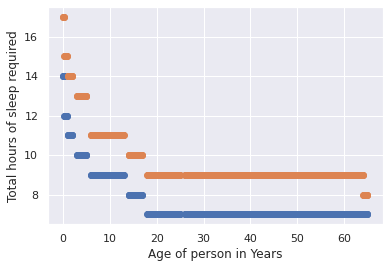

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# 일반적인 산점도
plt.scatter(x=sleep['age']/12.,
            y=sleep['min_recommended'])

plt.scatter(x=sleep['age']/12.,
            y=sleep['max_recommended'])

plt.xlabel('Age of person in Years')
plt.ylabel('Total hours of sleep required')
plt.show()

그래프를 작성하는 것은 어렵지 않다. 다만 해석이 조금 난해할 뿐이다. 문제는 산점도로 그리니, 무언가 딱딱 끊기는 느낌이다. 이번에는 선 그래프로 전환해보자. 사실 전체적인 코드는 비슷하고, `g--`, `r--` 명령어만 추가했다. 

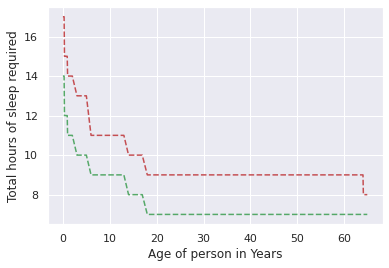

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

plt.plot(sleep['age']/12.,
         sleep['min_recommended'], 'g--')

plt.plot(sleep['age']/12.,
         sleep['max_recommended'], 
         'r--')

plt.xlabel('Age of person in Years')
plt.ylabel('Total hours of sleep required')
plt.show()

위 두 그래프 모두 시간이 지남에 따라 필요한 수면시간이 감소하다가 약 18세 되는 시점부터는 일정한 것을 알 수 있다. 

이번에는 `iris`데이터를 활용하는데, `matplotlib` 스타일로 그래프를 작성한다. 

No handles with labels found to put in legend.


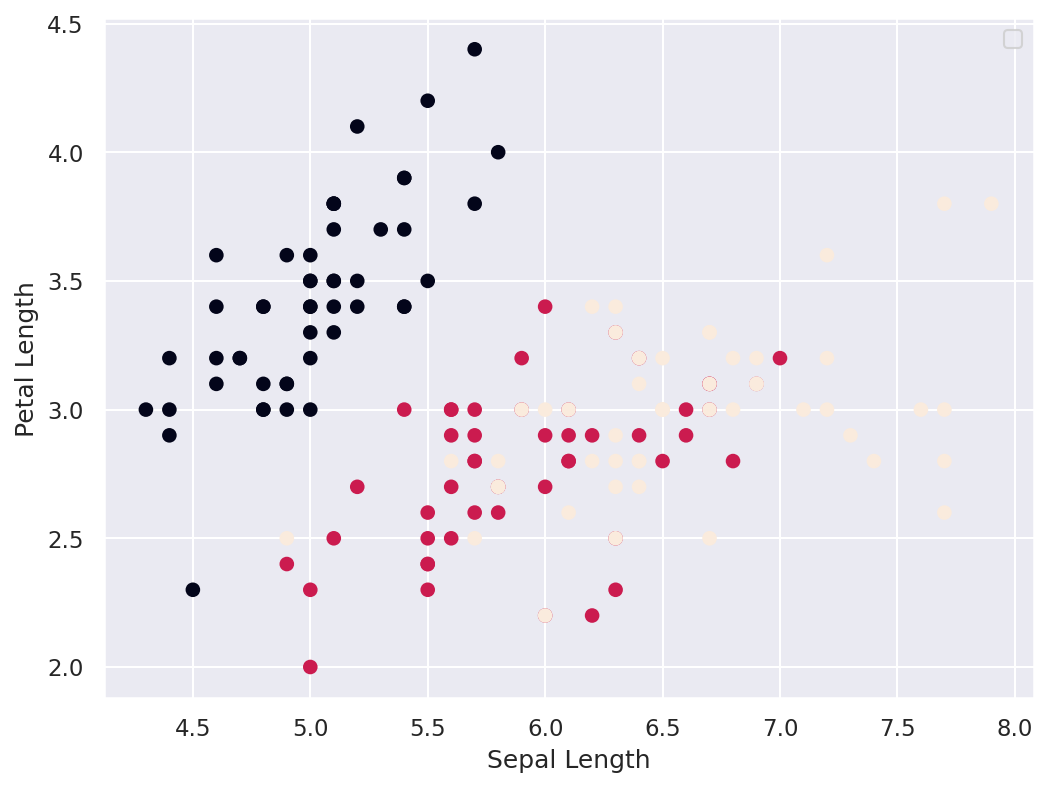

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 150
sns.set()

iris = sns.load_dataset('iris')
iris['species'] = iris['species'].map({'setosa': 0, 'versicolor':1, 'virginica':2})

plt.scatter(x=iris['sepal_length'], 
            y=iris['sepal_width'], c=iris.species)

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.show()

그런데, 여기에 한가지 문제점이 있다. 범례(`legend`)가 없어서 어떤 종인지 색상의 구별이 잘 가지 않는다. 이럴 때 어떻게 해야할까? 

이 때에는 사실 `matplotlib`만 활용하면 조금 코드가 복잡해진다. 아래 코드를 보자.  

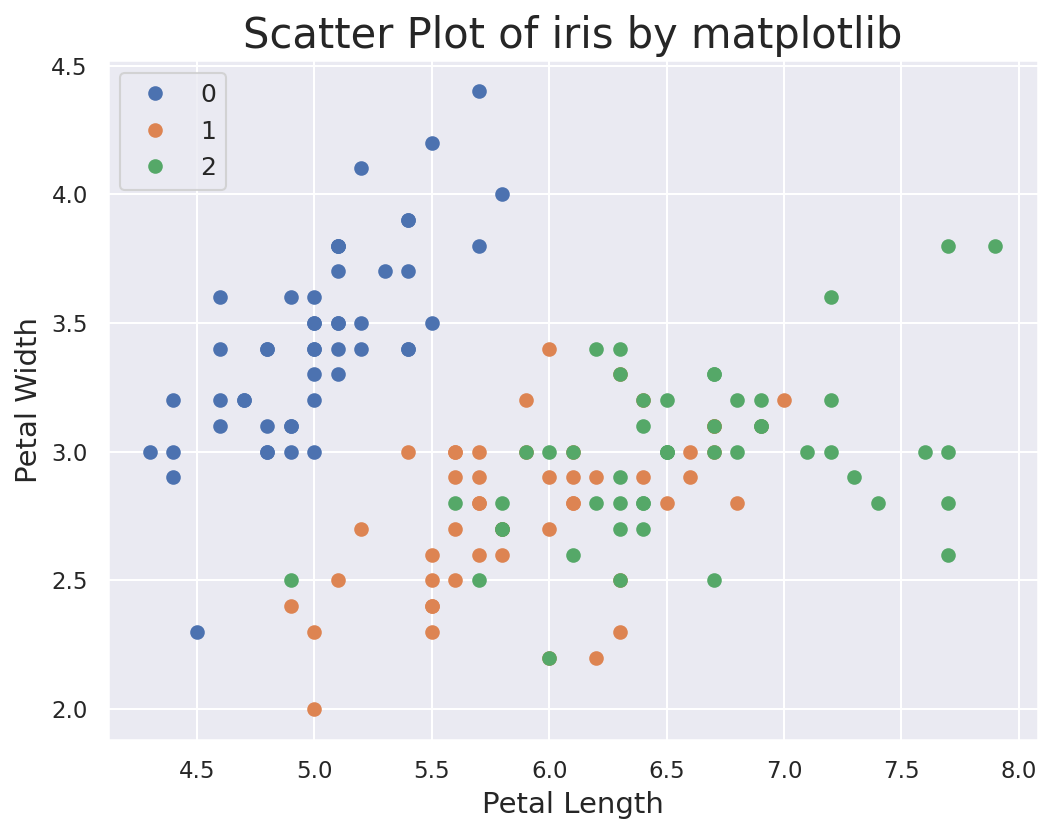

In [23]:
# Scatter plot with a different color by groups
groups = iris.groupby('species')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.sepal_length, 
            group.sepal_width, 
            marker='o', 
            linestyle='',
            label=name)

ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('Scatter Plot of iris by matplotlib', fontsize=20)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.show()

즉 For-loop를 활용해서 각각의 `label`을 해줘야 하는 매우 큰 번거로움이 있다. 이 때에는 `seaborn` 패키지를 활용하면 매우 쉽게 그래프를 작성할 수 있다. 

### (3) seaborn 방식

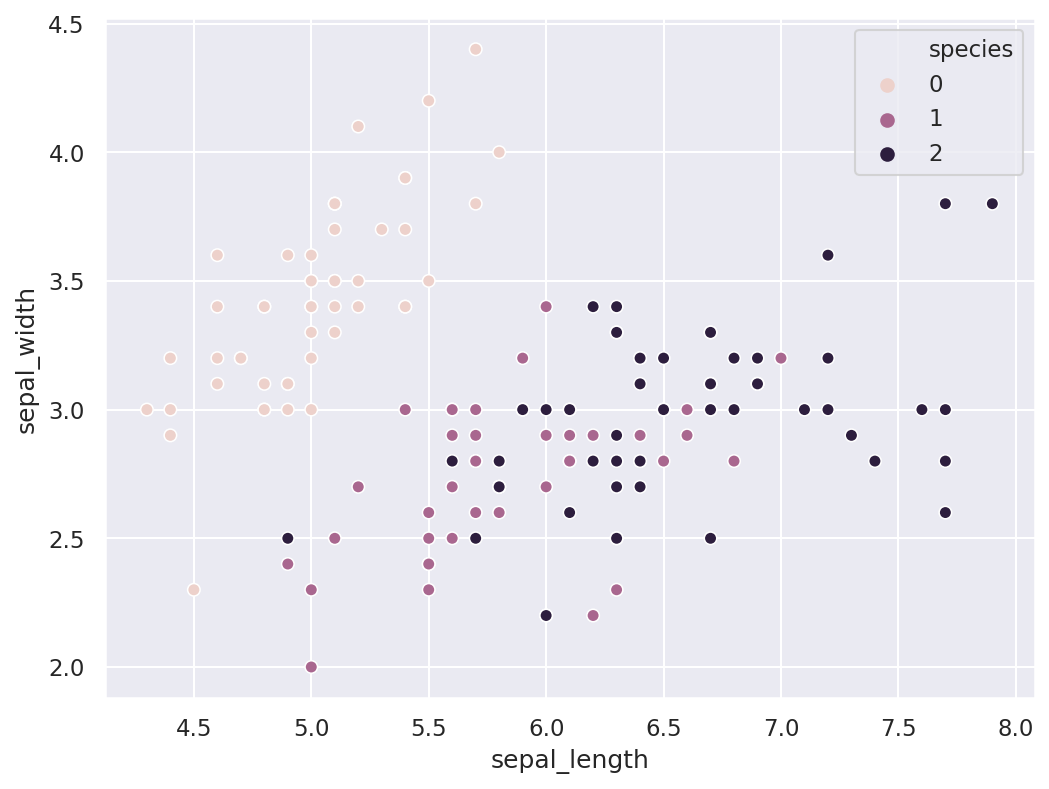

In [24]:
iris = sns.load_dataset('iris')
iris['species'] = iris['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
sns.scatterplot(x=iris['sepal_length'], 
                y=iris['sepal_width'], hue=iris.species, data=iris)

위와 같이 코드가 매우 간결해진 것을 볼 수 있다. 

## V. 실습파일
- 구글코랩에서 빠르게 실습도 할 수 있습니다. [실습](https://colab.research.google.com/github/chloevan/python_visualisation/blob/master/matplotlib/matplotlib_03_scatterplot.ipynb)

## VI. Reference
Mukhiya, Uuresh Kumar. Ahmed Usman. Hands-on Exploratory Data Analysis With Python: Perform EDA Techniques to understand, Summarize, and Investigate Your Data. Packt publishing limited, 2020.